<div style="font-family:monospace; 
            border-radius:10px; 
            border:#f77f00 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align: right">

<h1 align="left"><font color='#000000'>SDSC2001 Tutorial 8: Polars</font></h1>

TA: Collin Sakal

In [ ]:
#!pip install polars
!pip install -U polars

In [1]:
import polars as pl

<div style="font-family:monospace; 
            border-radius:10px; 
            border:#f77f00 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align: right">

<h2 align="left"><font color='#000000'>Tutorial Overview</font></h2>

In this tutorial we will go through an example of an exploratory data analysis (EDA) using a data set containing information about crabs.

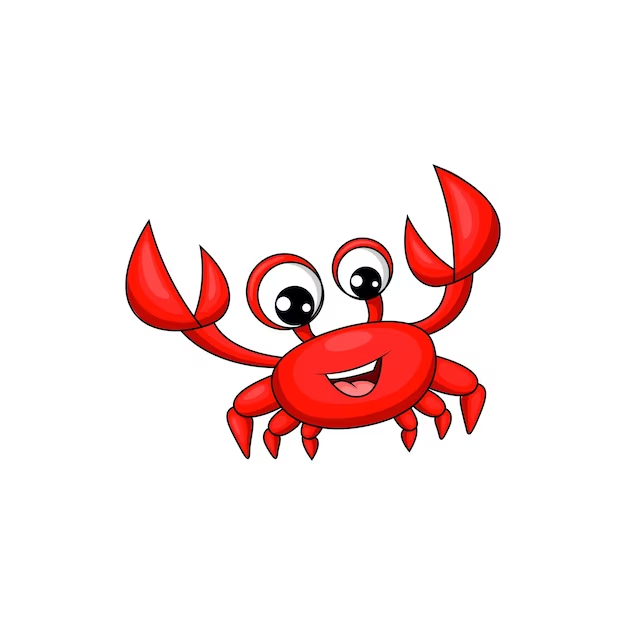

<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 0px; 
          color: black; 
          font-size: 150%; 
          text-align: left;
          padding: 8px; 
          border-bottom: 3px solid #4cc9f0" >Reference Table</p>
          
If you get stuck on any of the problems in this tutorial please reference the table below. 

| Polars Concept | Example Code | Notes |
| :--- | :--- | :--- | 
| Reading in a .csv file | ```pl.read_csv('your file path here')```||
| Getting column names | ```df.columns```|Assumes the data frame is named df|
| Getting row and column counts |```df.height```, ```df.width```||
| Getting null (missing) counts by column |```df.null_count()```||
| Selecting specific columns| ```df.select(['colname1', 'colname2', ...])```|Returns a data frame. Use ```.get_column()``` to return a series|
|Statistical summaries of a column|```df.select(['colname']).mean()``` <br /> <br /> ```df.get_column('colname').mean()```| Using ```select()``` will return a data frame whereas ```get_column()``` returns a numeric value. Can be used for other operations ```.min()``` ```.max()``` etc|
| Filtering (subsetting) the data | ```df.filter(pl.col('colname') == value)``` | Filters (subsets) the data frame based on a condition. The filtering column must be referenced using ```pl.col()``` and some condition ```==, <, <=, >, >=, !=, is_in(), etc```. <br /> <br /> Multiple conditions using and/or logic can be used. For multiple conditions you must put the conditons in parenthesis and connect them with and/or symbols|
|Creating a new column|```df = df.with_columns(..operations..)```|Code within ```.with_columns()``` will determine the values of the new column. Be sure to use ```.alias('column name')``` to properly name the new column|
|When Then Logic|```pl.when(pl.col('colname') > value).then(0)```| Often used to create a new column within ```with_columns()``` based on some condition(s)|

<div style="font-family:monospace; 
            border-radius:10px; 
            border:#A8A8A8 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align:left">

<h3 align="left"><font color='#000000'> Data Introduction</font></h3>
    
The data set used in this tutorial was taken from one of [Kaggle's Playground Series Competitions](https://www.kaggle.com/competitions/playground-series-s3e16/overview). The goal of the competition was to predict the age of a crabs based on various measurements and other information.
    
Since developing machine learning models is beyond the scope of what has been taught in the course so far, we will instead perform an exploratory data analysis (EDA) using Polars.

<div style="font-family:monospace; 
            border-radius:10px; 
            border:#A8A8A8 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align:left">

<h3 align="left"><font color='#000000'> (1) Reading in the data set</font></h3>
    
1. Read in the data set ```crab-data.csv``` and assign it the name ```df```
2. Print the column names of the data set

In [2]:
# Write your code here
df = pl.read_csv('crab-data.csv')
df.columns

['id',
 'Sex',
 'Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'Age']

<div style="font-family:monospace; 
            border-radius:10px; 
            border:#A8A8A8 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align:left">

<h3 align="left"><font color='#000000'> (2) Data Characteristics</font></h3>
    
Write code that returns the following information:
    
1. The number of rows in the data
2. The number of columns
3. The number of missing values in each column
4. The percentage of missing values in each column (**more difficult**)

In [3]:
# Write your code here (for rows and columns calculations)
print(f'The number of rows in the data frame is {df.height}')
print(f'The number of columns in the data frame is {df.width}')

# df.glimpse()
# df.shape
# df.width
# df.height

The number of rows in the data frame is 74051
The number of columns in the data frame is 10


In [4]:
# Write your code here determining the number of missing values
df.null_count()

id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0


In [5]:
# Write your code here for determining the percentage of missing values
df.null_count()/df.height

id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div style="font-family:monospace; 
            border-radius:10px; 
            border:#A8A8A8 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align:left">

<h3 align="left"><font color='#000000'> (2) Subsetting the original data frame</font></h3>
    
1. In this analysis we will only use the columns ```Age```, ```Length```, ```Diameter```, ```Height```, and ```Weight```. Select only these columns from the data frame 
2. Print the column names again to show that your code has run correctly


In [6]:
# Write your code here
df = df.select(['Age', 'Length', 'Diameter', 'Height', 'Weight'])
df.columns

['Age', 'Length', 'Diameter', 'Height', 'Weight']

<div style="font-family:monospace; 
            border-radius:10px; 
            border:#A8A8A8 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align:left">

<h3 align="left"><font color='#000000'> (3) Descriptive Statistics</font></h3>
    
1. Write code that computes the following statistics:
    * The maximum age
    * The 50th quantile for age
    * The 25th quantile for age
    * The average age
    * The standard deviation of all ages
    

In [7]:
# Write your code here
print(f'The maxmimum age is: {df.get_column("Age").max()}')
print(f'The 50th quantile for age is {df.get_column("Age").quantile(0.50)}')
print(f'The 25th quantile for age is {df.get_column("Age").quantile(0.25)}')
print(f'The average age is: {df.get_column("Age").mean()}')
print(f'The standard deviation for age is {df.get_column("Age").std()}')

df.get_column('Age').describe()
#df.select(['Age']).describe() # Using select() also works

The maxmimum age is: 29
The 50th quantile for age is 10.0
The 25th quantile for age is 8.0
The average age is: 9.967805971560141
The standard deviation for age is 3.175189200817569


statistic,value
str,f64
"""count""",74051.0
"""null_count""",0.0
"""mean""",9.967806
"""std""",3.175189
"""min""",1.0
"""25%""",8.0
"""50%""",10.0
"""75%""",11.0
"""max""",29.0


<div style="font-family:monospace; 
            border-radius:10px; 
            border:#A8A8A8 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align:left">

<h3 align="left"><font color='#000000'> (4) Filtering (subsetting) the Data</font></h3>
 
1. Filter (subset) the original data frame to include only crabs who are older than 11 years old. How many crabs are there that are older than 11? 
2. Filter (subset) the original data frame to include only crabs older than 4 **AND** less than 11 years old. How many crabs are in the subset? 
    
**HINT for (2)** Multiple conditions can be used within ```.filter()``` by using ```df.filter((condition 1) & (condition 2))``` (use ```|``` instead of ```&``` for 'or' logic). Note that the conditions, for example ```pl.col('colname') == 5```, must be in parenthesis if there are more than one condition.

In [8]:
# Write your code here for (1)
print(f'The number of crabs older than eleven is {df.filter(pl.col("Age") > 11).height}')

The number of crabs older than eleven is 17176


In [9]:
# Write your code here for (2)
answer = df.filter((pl.col("Age") > 4) & (pl.col("Age") < 11)).height
print(f'The number of crabs in the subset is {answer}')    

The number of crabs in the subset is 46938


<div style="font-family:monospace; 
            border-radius:10px; 
            border:#A8A8A8 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align:left">

<h3 align="left"><font color='#000000'> (5) Creating a new column</font></h3>
 
Create a new column named ```height_category``` that equals 0 if a crab's ```Height``` is below the median height and 1 if a crab's height greater than or equal to the median height. 
    
**Hint:** you use ```.with_columns()``` to create a new column. You may want to consider using a ```pl.when().then()``` style solution. Recall that we can chain together many ```pl.when().then()``` statements ```pl.when().then().when().then().....```. Use ```.alias('colname')``` to define the name of the column.

In [10]:
# First calculate the median
height_median = df.get_column('Height').median() # Note you can also use .quantile(50) to get the median

# Create the new column
df = df.with_columns(
    pl.when(pl.col('Height') < height_median).then(0)\
    .when(pl.col('Height') >= height_median).then(1)\
    .alias('height_category')
)

# Check that the column was added correctly
df.head(10)

Age,Length,Diameter,Height,Weight,height_category
i64,f64,f64,f64,f64,i32
9,1.525,1.175,0.375,28.973189,1
8,1.1,0.825,0.275,10.418441,0
9,1.3875,1.1125,0.375,24.777463,1
11,1.7,1.4125,0.5,50.660556,1
8,1.25,1.0125,0.3375,23.289114,0
10,1.5,1.175,0.4125,28.845616,1
11,1.575,1.1375,0.35,30.02212,0
11,1.3125,1.025,0.35,18.299602,0
12,1.6,1.2875,0.4375,38.82464,1


<div style="font-family:monospace; 
            border-radius:10px; 
            border:#A8A8A8 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align:left">

<h3 align="left"><font color='#000000'> (6) Grouping and aggregating</font></h3>
 
Write code that calculates the average ```Age``` for each category in ```height_category``` (the new column we just created in Part 5). Do taller crabs have an average age that's higher or lower than shorter crabs?
    
**Hint:** You may wish to use the ```.group_by().agg()``` methods.

In [11]:
# Write your code below
df.group_by(
    pl.col('height_category')
).agg(
    pl.col('Age').mean().alias('mean age')
)

height_category,mean age
i32,f64
0,8.208285
1,11.555516
